# Hamilton vs. Bottas DutchGP 2021

In [3]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [6]:
# Enable the cache
ff1.Cache.enable_cache('./cache')

In [7]:
# Collect all race laps
laps = race.load_laps(with_telemetry=True)

# Get laps of the drivers (BOT and HAM)
laps_bot = laps.pick_driver('BOT')
laps_ham = laps.pick_driver('HAM')

# Extract the fastest laps
fastest_bot = laps_bot.pick_fastest()
fastest_ham = laps_ham.pick_fastest()

E:\anconda\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18'

In [8]:
# Get telemetry from fastest laps
telemetry_bot = fastest_bot.get_car_data().add_distance()
telemetry_ham = fastest_ham.get_car_data().add_distance()

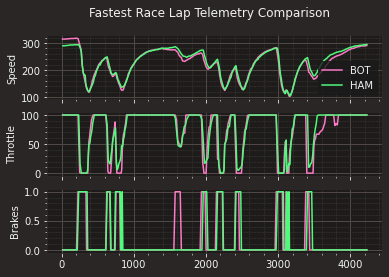

In [10]:
# Setup plotting
plotting.setup_mpl()

fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(telemetry_bot['Distance'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")
ax[1].plot(telemetry_bot['Distance'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Distance'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')
ax[2].plot(telemetry_bot['Distance'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()